In [ ]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Twitter Api Credentials
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""

In [ ]:
# Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# Creating the API object while passing in auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [ ]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name="kartiktalk", count = 1000, lang ="en", tweet_mode="extended")

#  Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) 👇Yes! https://t.co/aY2wsv7CgK

2) Merry Christmas and Happy Holidays! Stay safe! 🎄

3) #Micolash was one of the most gimmicky bosses in #bloodborne Just finished the game. #fromsoftware take a bow. Again. #sekiro downloading. #HappyHolidays2020 🕹🎄 https://t.co/CvYWkdhDb6

4) RT @tim_cook: We believe users should have the choice over the data that is being collected about them and how it’s used. Facebook can cont…

5) 🙌 https://t.co/Bqs2paWPQe



In [ ]:
# Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,👇Yes! https://t.co/aY2wsv7CgK
1,Merry Christmas and Happy Holidays! Stay safe! 🎄
2,#Micolash was one of the most gimmicky bosses ...
3,RT @tim_cook: We believe users should have the...
4,🙌 https://t.co/Bqs2paWPQe


In [ ]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets
0,👇Yes!
1,Merry Christmas and Happy Holidays! Stay safe! 🎄
2,Micolash was one of the most gimmicky bosses i...
3,_cook: We believe users should have the choice...
4,🙌
5,The SwissCheeseModel developed 30 years ago ad...
6,_rowling: 'All of the great leaders have had o...
7,: My parents taught me to leave the world bett...
8,I have a lot to be thankful for. Happy Thanksg...
9,RIPDiegoMaradonna . A true legend!


In [ ]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

,Tweets,Subjectivity,Polarity
0,👇Yes!,0.000000,0.000000
1,Merry Christmas and Happy Holidays! Stay safe! 🎄,0.750000,0.812500
2,Micolash was one of the most gimmicky bosses i...,0.466667,-0.033333
3,_cook: We believe users should have the choice...,0.000000,0.000000
4,🙌,0.000000,0.000000
5,The SwissCheeseModel developed 30 years ago ad...,0.300000,0.100000
6,_rowling: 'All of the great leaders have had o...,0.572222,0.144444
7,: My parents taught me to leave the world bett...,0.500000,0.500000
8,I have a lot to be thankful for. Happy Thanksg...,1.000000,0.800000
9,RIPDiegoMaradonna . A true legend!,0.650000,0.437500


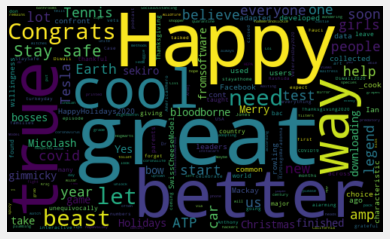

In [ ]:
# word cloud visualization
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,👇Yes!,0.000000,0.000000,Neutral
1,Merry Christmas and Happy Holidays! Stay safe! 🎄,0.750000,0.812500,Positive
2,Micolash was one of the most gimmicky bosses i...,0.466667,-0.033333,Negative
3,_cook: We believe users should have the choice...,0.000000,0.000000,Neutral
4,🙌,0.000000,0.000000,Neutral
5,The SwissCheeseModel developed 30 years ago ad...,0.300000,0.100000,Positive
6,_rowling: 'All of the great leaders have had o...,0.572222,0.144444,Positive
7,: My parents taught me to leave the world bett...,0.500000,0.500000,Positive
8,I have a lot to be thankful for. Happy Thanksg...,1.000000,0.800000,Positive
9,RIPDiegoMaradonna . A true legend!,0.650000,0.437500,Positive


In [ ]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) Merry Christmas and Happy Holidays! Stay safe! 🎄

2) The SwissCheeseModel developed 30 years ago adapted for covid by Ian Mackay.  

3) _rowling: 'All of the great leaders have had one characteristic in common: it was the willingness to confront unequivocally the major…

4) : My parents taught me to leave the world better than I found it. 

So many people across the country believe in giving bac…

5) I have a lot to be thankful for. Happy Thanksgiving everyone. Stay safe!Thanksgiving2020 turkeyday

6) RIPDiegoMaradonna . A true legend! 

7) : In our first podcast episode, Rashida Jones and I talked to Dr. Anthony Fauci about what to expect in the coming months and…

8) Happy Diwali to all who celebrate! Diwali2020

9) Very grateful to our vets and their families 🙏  VeteransDay2020 AmericanHero USA 🇺🇸

10) Very cool interactive art 

11) With everything that’s going on, don’t forget to stay safe. Covid numbers are alarming! stayathome StaySafe COVID19 Socia

In [ ]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) Micolash was one of the most gimmicky bosses in bloodborne Just finished the game. fromsoftware take a bow. Again. sekiro downloading. HappyHolidays2020 🕹🎄 

2) : Case closed 

3) Uber built a fake city to test their self-driving cars 



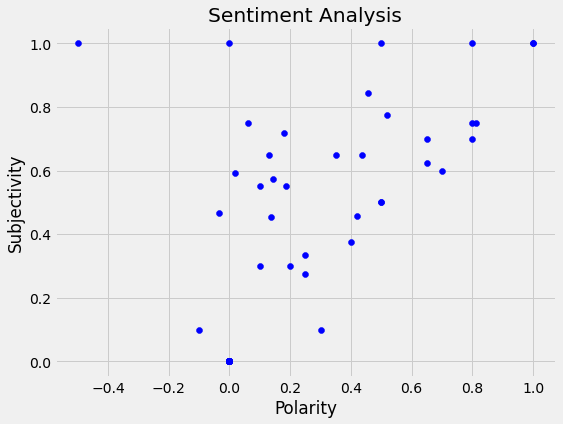

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [ ]:
# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

57.4

In [ ]:
# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

5.6

In [ ]:
# Show the value counts
df['Analysis'].value_counts()

Positive    31
Neutral     20
Negative     3
Name: Analysis, dtype: int64

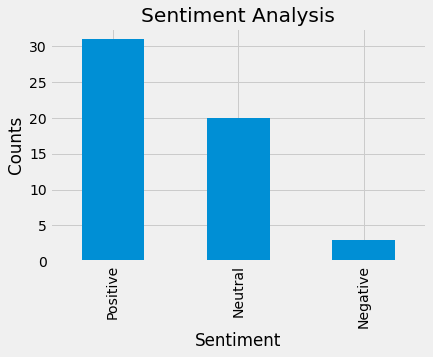

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()